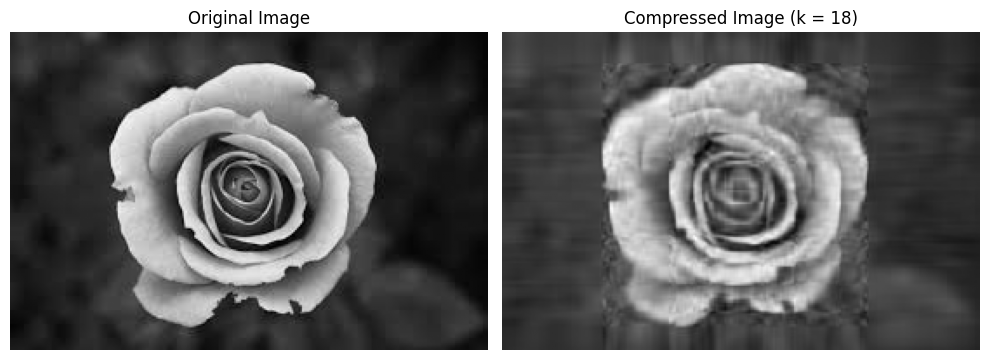

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Step 1: Load and Convert to Grayscale (if needed)
def load_grayscale_image(image_path):
    image = imread(image_path)

    # If it's already grayscale (2D), return as-is
    if len(image.shape) == 2:
        return image

    # Convert RGB to grayscale using luminosity method
    grayscale = 0.2989 * image[:, :, 0] + \
                0.5870 * image[:, :, 1] + \
                0.1140 * image[:, :, 2]
    return grayscale

# Step 2: Perform SVD
def compute_svd(image):
    U, S, V_T = np.linalg.svd(image, full_matrices=False)
    return U, S, V_T

# Step 3: Reconstruct with k components
def reconstruct_image(U, S, V_T, k):
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    V_k = V_T[:k, :]
    return U_k @ S_k @ V_k

# Step 4: Display Original and Compressed Images
def display_images(original, compressed, k):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f"Compressed Image (k = {k})")
    plt.imshow(compressed, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# ---------- Main Routine ----------
if __name__ == "__main__":
    # Load image (provide your path here)
    image_path ='C:\\Users\\HP\\Pictures\\Saved Pictures\\grayscale.jpg'  # Replace with your grayscale image file
    original_image = load_grayscale_image(image_path)

    # Perform SVD
    U, S, V_T = compute_svd(original_image)

    # Choose top k singular values (e.g., top 10%)
    k = int(0.1 * len(S))  # Adjust this ratio as needed

    # Reconstruct image
    compressed_image = reconstruct_image(U, S, V_T, k)

    # Display
    display_images(original_image, compressed_image, k)
